# Housing Price Prediction

In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy.stats import zscore
import matplotlib.pyplot as plt
import sklearn 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import GridSearchCV
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

Importing All the necessary libraries.

# Reading and Understanding the Data

In [2]:
df_train = pd.read_csv('C:/Users/Jai Mata Di/Downloads/Project-Housing--2---1-/Project-Housing_splitted/train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


Here we read the csv file of data to be Trained in jupyter notebook.

In [3]:
dftrain = pd.DataFrame(data=df_train)
dftrain.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000
1167,617,60,RL,NaN,7861,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,183200


Here we are loading the Train dataset into DataFrame and displaying it's last five rows.

In [4]:
dftrain.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1123,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
362,313,190,RM,65.0,7800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2006,WD,Normal,119900
587,1373,60,RL,75.0,9750,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,274300
38,361,85,RL,NaN,7540,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,156000
495,625,60,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,165150
507,1254,60,RL,NaN,17542,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal,294000
857,1401,50,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,120000
499,1111,60,RL,NaN,8000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,188000
539,685,60,RL,58.0,16770,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,221000
496,417,60,RL,74.0,7844,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2006,WD,Normal,149500


Displaying 10 random samples of Train data to understand it more.

In [5]:
df_test = pd.read_csv('C:/Users/Jai Mata Di/Downloads/Project-Housing--2---1-/Project-Housing_splitted/test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


Here we read the csv file of data to be Tested in jupyter notebook.

In [6]:
dftest = pd.DataFrame(data=df_test)
dftest.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal
291,1379,160,RM,21.0,1953,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal


Here we are loading the Test dataset into DataFrame and displaying it's last five rows.

# Data Inspection

In [7]:
dftrain.shape

(1168, 81)

There are 1168 rows and 81 columns in the dataset to be trained. 

In [8]:
dftest.shape

(292, 80)

There are 292 rows and 80 columns in the dataset to be tested.

In [9]:
dftrain.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

It gives us the datatypes of all variables. 

In [10]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

It gives us the column names with their total non-null count , datatype and memory usage of Train dataset.

In [11]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

It gives us the column names with their total non-null count , datatype and memory usage of Test dataset.

In [12]:
dftrain.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Data Cleaning

In [13]:
#Checking for Null values
dftrain.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

There exists null values.

<AxesSubplot:>

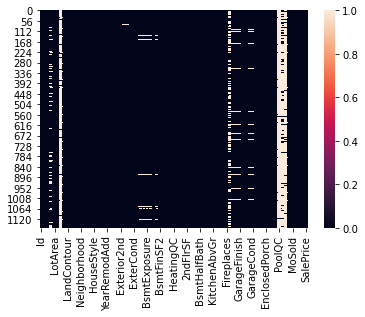

In [14]:
sn.heatmap(dftrain.isnull())

There are so many missing values. From the above visualization and info function it is clear that columns 'LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond' have few missing values, which we will treat by imputation methods. Columns like 'FireplaceQu', 'Alley', 'PoolQC', 'Fence' and 'MiscFeature' over 80% missing values and hence we will drop them.

In [15]:
dftrain.drop(['Id', 'FireplaceQu', 'Alley', 'PoolQC', 'Fence', 'MiscFeature'],axis=1,inplace=True)
dftest.drop(['Id', 'FireplaceQu', 'Alley', 'PoolQC', 'Fence', 'MiscFeature'],axis=1,inplace=True)
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
dftrain['MasVnrType']=imp.fit_transform(dftrain['MasVnrType'].values.reshape(-1,1))
dftrain['BsmtQual']=imp.fit_transform(dftrain['BsmtQual'].values.reshape(-1,1))
dftrain['BsmtCond']=imp.fit_transform(dftrain['BsmtCond'].values.reshape(-1,1))
dftrain['BsmtExposure']=imp.fit_transform(dftrain['BsmtExposure'].values.reshape(-1,1))
dftrain['BsmtFinType1']=imp.fit_transform(dftrain['BsmtFinType1'].values.reshape(-1,1))
dftrain['BsmtFinType2']=imp.fit_transform(dftrain['BsmtFinType2'].values.reshape(-1,1))
dftrain['GarageType']=imp.fit_transform(dftrain['GarageType'].values.reshape(-1,1))
dftrain['GarageFinish']=imp.fit_transform(dftrain['GarageFinish'].values.reshape(-1,1))
dftrain['GarageQual']=imp.fit_transform(dftrain['GarageQual'].values.reshape(-1,1))
dftrain['GarageCond']=imp.fit_transform(dftrain['GarageCond'].values.reshape(-1,1))
dftest['MasVnrType']=imp.fit_transform(dftest['MasVnrType'].values.reshape(-1,1))
dftest['BsmtQual']=imp.fit_transform(dftest['BsmtQual'].values.reshape(-1,1))
dftest['BsmtCond']=imp.fit_transform(dftest['BsmtCond'].values.reshape(-1,1))
dftest['BsmtExposure']=imp.fit_transform(dftest['BsmtExposure'].values.reshape(-1,1))
dftest['BsmtFinType1']=imp.fit_transform(dftest['BsmtFinType1'].values.reshape(-1,1))
dftest['BsmtFinType2']=imp.fit_transform(dftest['BsmtFinType2'].values.reshape(-1,1))
dftest['GarageType']=imp.fit_transform(dftest['GarageType'].values.reshape(-1,1))
dftest['GarageFinish']=imp.fit_transform(dftest['GarageFinish'].values.reshape(-1,1))
dftest['GarageQual']=imp.fit_transform(dftest['GarageQual'].values.reshape(-1,1))
dftest['GarageCond']=imp.fit_transform(dftest['GarageCond'].values.reshape(-1,1))

im=SimpleImputer(missing_values=np.nan,strategy='mean')
dftrain['LotFrontage']=im.fit_transform(dftrain['LotFrontage'].values.reshape(-1,1))
dftrain['MasVnrArea']=im.fit_transform(dftrain['MasVnrArea'].values.reshape(-1,1))
dftrain['GarageYrBlt']=im.fit_transform(dftrain['GarageYrBlt'].values.reshape(-1,1))
dftest['LotFrontage']=im.fit_transform(dftest['LotFrontage'].values.reshape(-1,1))
dftest['MasVnrArea']=im.fit_transform(dftest['MasVnrArea'].values.reshape(-1,1))
dftest['GarageYrBlt']=im.fit_transform(dftest['GarageYrBlt'].values.reshape(-1,1))

We have treated the missing values using simple imputation.

<AxesSubplot:>

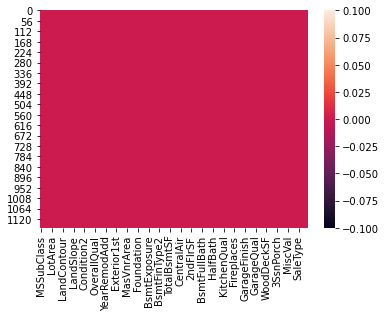

In [16]:
sn.heatmap(dftrain.isnull())

Visualizing the dataset after treating the null values. 

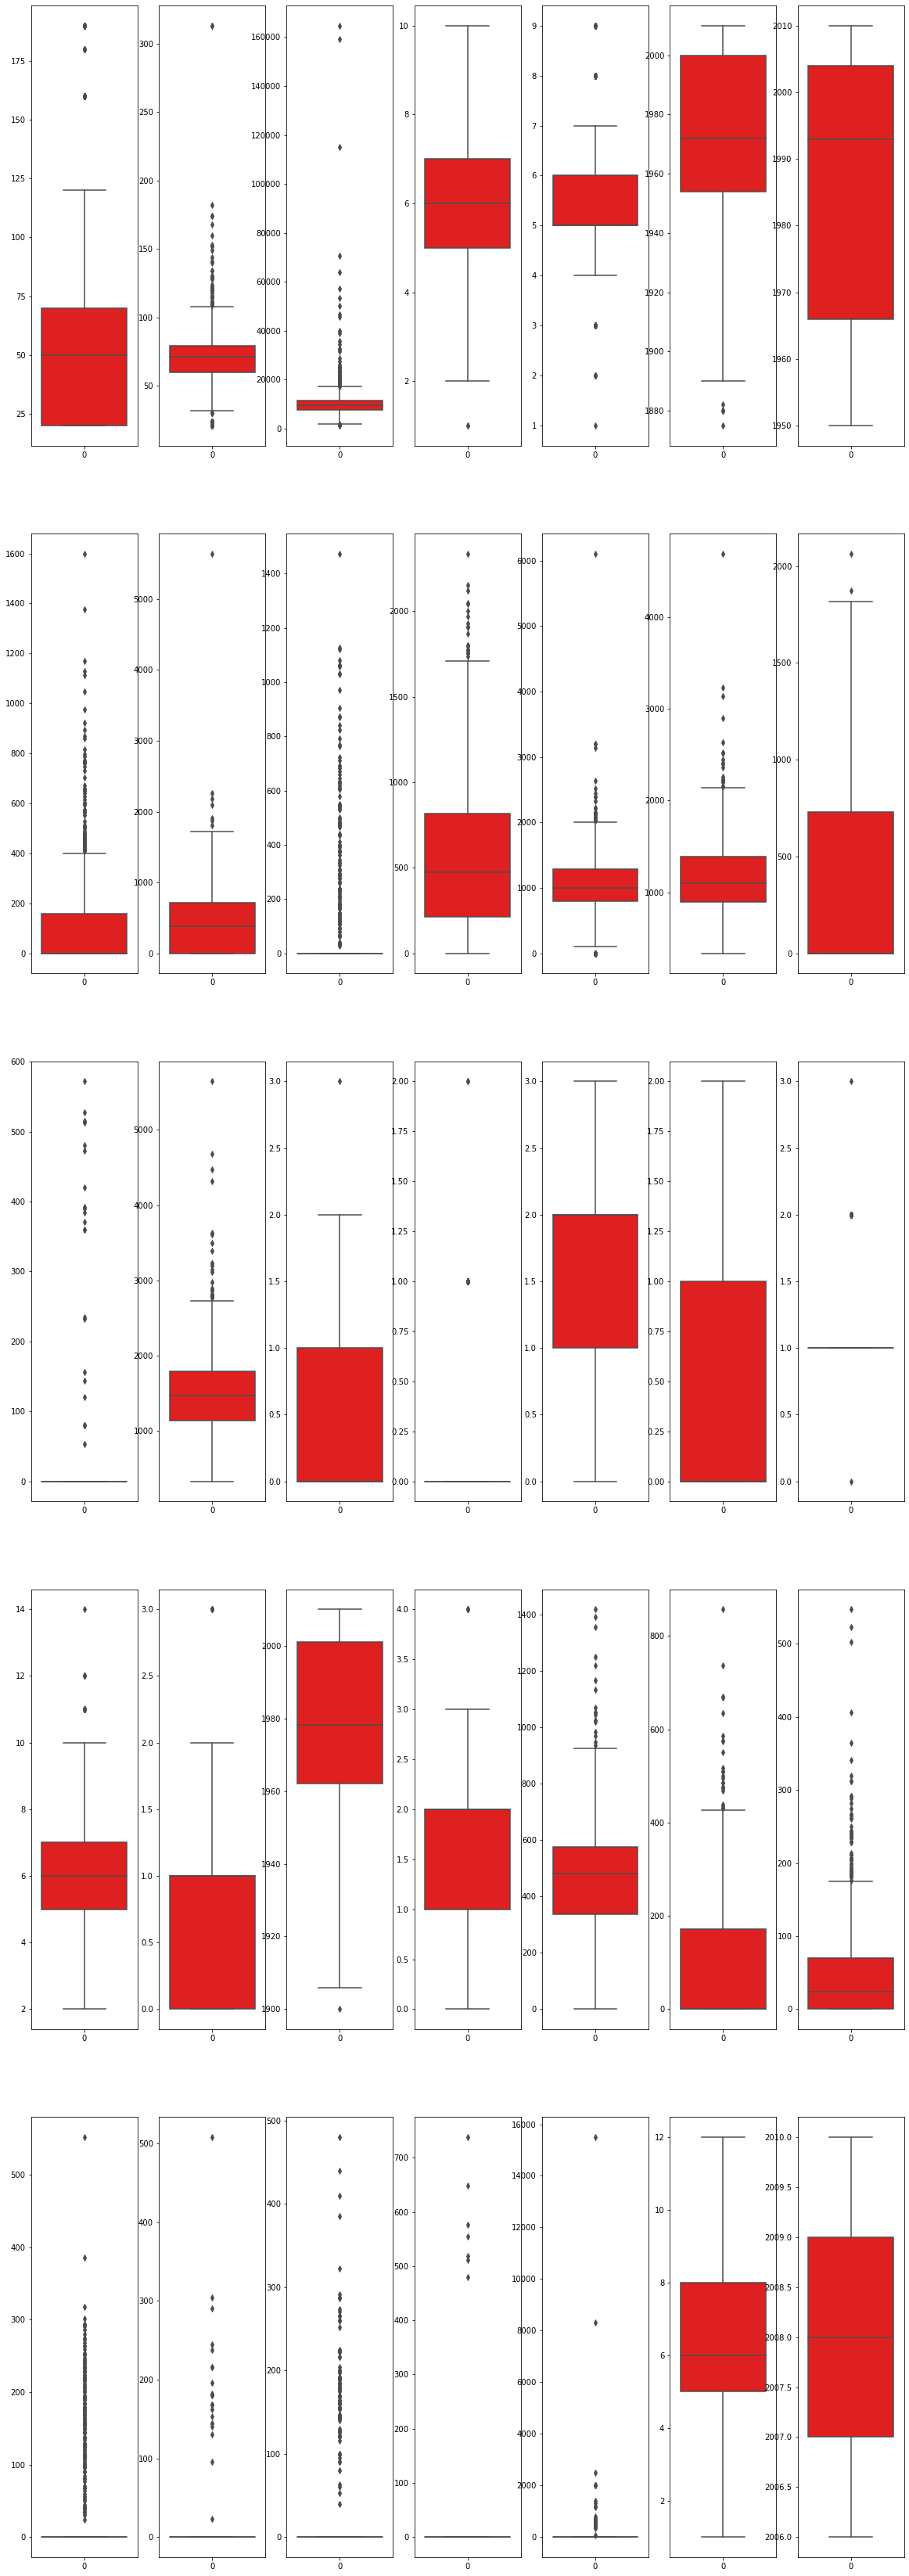

In [17]:
numcolnew= ['MSSubClass', 'LotFrontage','LotArea', 'OverallQual','OverallCond', 'YearBuilt', 'YearRemodAdd','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea', 'BsmtFullBath','BsmtHalfBath', 'FullBath', 'HalfBath','KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
ncol=20
nrows=10
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(numcolnew)):
    plt.subplot(5,7,i+1)
    sn.boxplot(data=dftrain[numcolnew[i]],color='red',orient='v')

There are many outliers in the Train dataset.

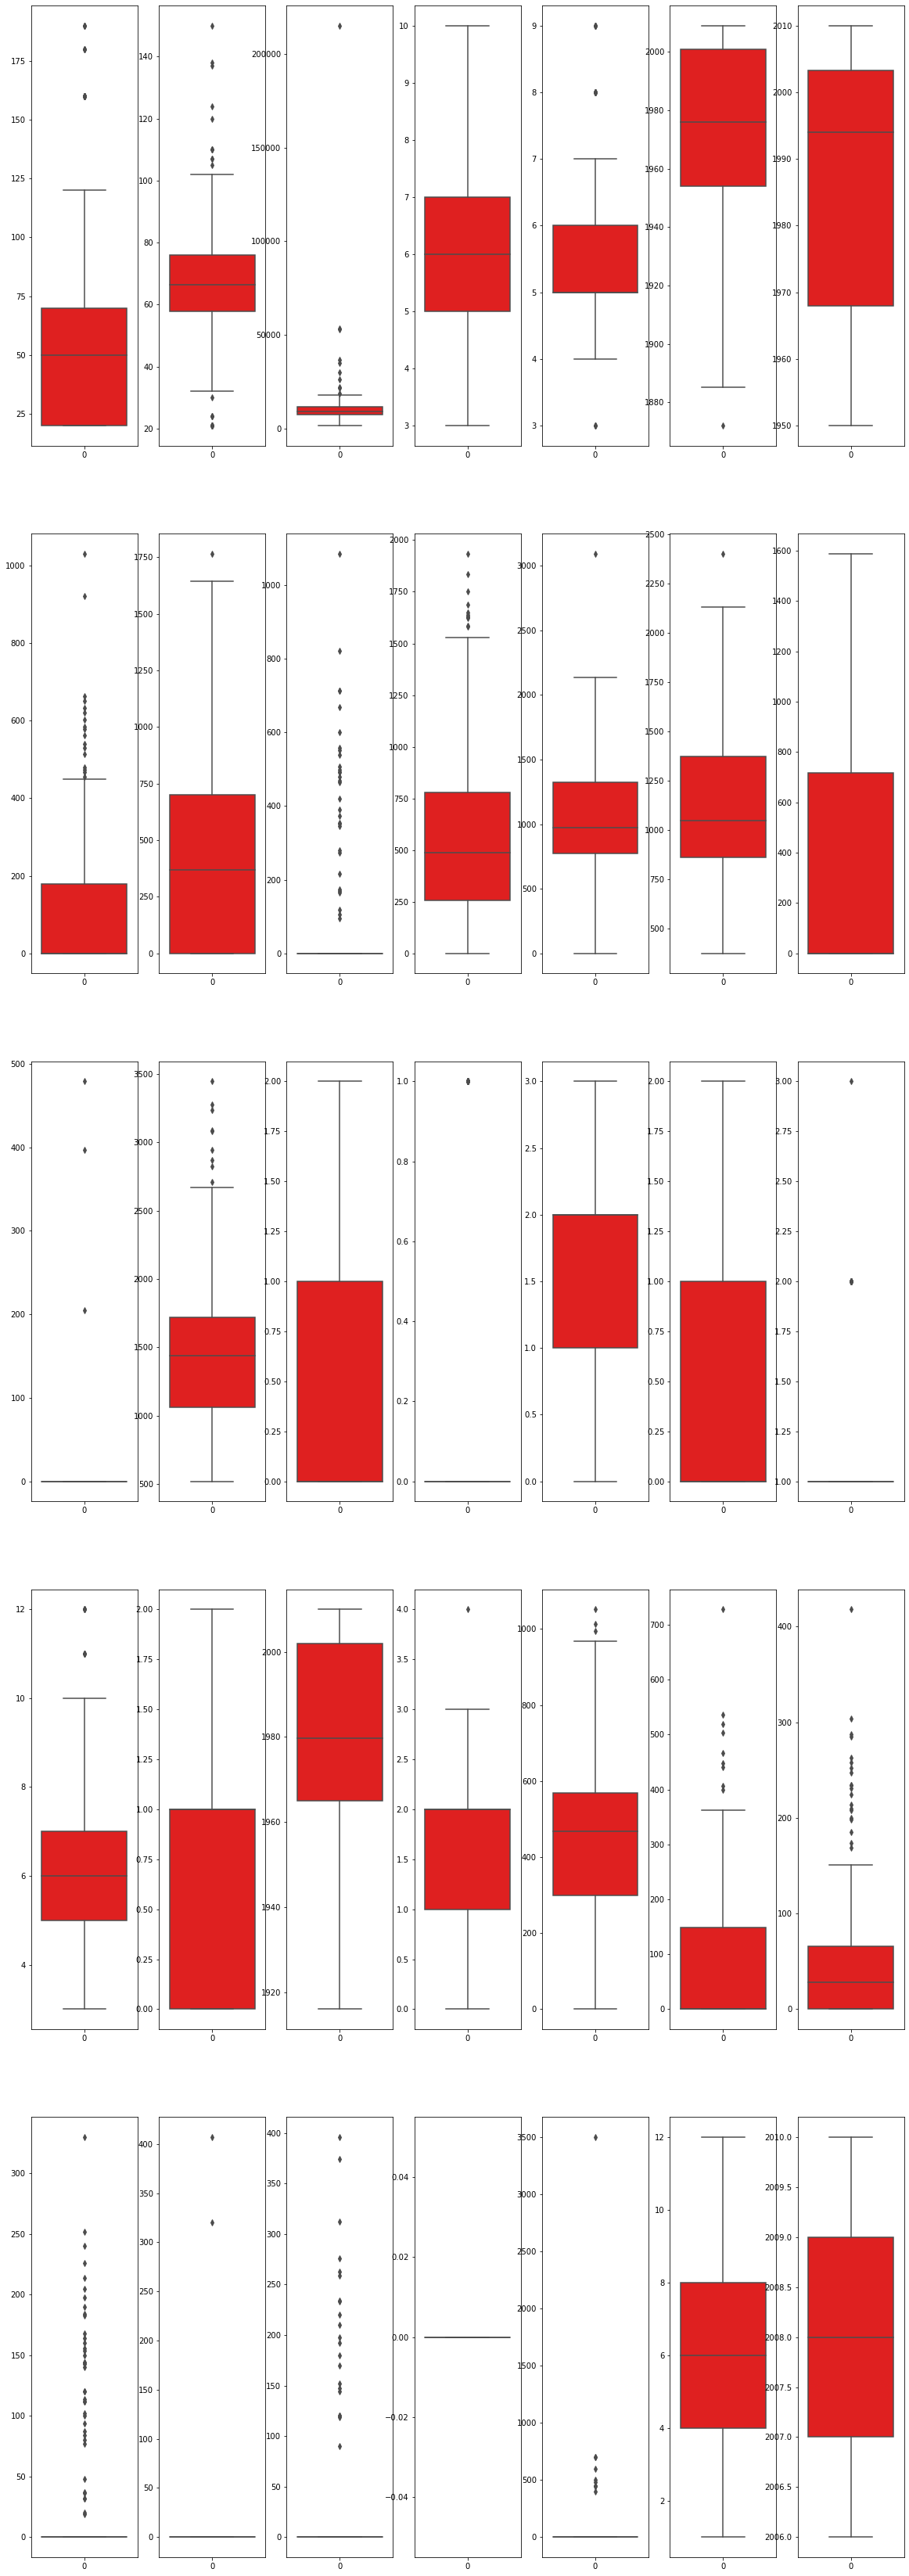

In [18]:
numcolnew= ['MSSubClass', 'LotFrontage','LotArea', 'OverallQual','OverallCond', 'YearBuilt', 'YearRemodAdd','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea', 'BsmtFullBath','BsmtHalfBath', 'FullBath', 'HalfBath','KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
ncol=20
nrows=10
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(numcolnew)):
    plt.subplot(5,7,i+1)
    sn.boxplot(data=dftest[numcolnew[i]],color='red',orient='v')

There are no considerable outliers in the Test Dataset.

In [19]:
import scipy
from scipy.stats import zscore
dfzscore=np.abs(zscore(dftrain[numcolnew]))
#print(np.where(dfzscore>4))
dfnew=dftrain[(dfzscore<4).all(axis=1)]
dftrain=dfnew
dftrain

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,RL,70.98847,4928,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2007,WD,Normal,128000
2,60,RL,92.00000,9920,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,6,2007,WD,Normal,269790
3,20,RL,105.00000,11751,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,1,2010,COD,Normal,190000
4,20,RL,70.98847,16635,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,6,2009,WD,Normal,215000
5,60,RL,58.00000,14054,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,11,2006,New,Partial,219210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,20,RL,70.98847,9819,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,122000
1164,20,RL,67.00000,8777,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2009,WD,Normal,108000
1165,160,RL,24.00000,2280,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,7,2009,WD,Normal,148500
1166,70,C (all),50.00000,8500,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,172,0,0,0,0,7,2008,WD,Normal,40000


Removing all the outliers with zscore more than 4.

Statistical way to represent and treat the outliers. 

In [20]:
print("Data Loss=",((1168-988)/1168)*100,'%')

Data Loss= 15.41095890410959 %


There is 15% loss of data after treating Outliers.

In [21]:
dftrain.skew()

MSSubClass        1.443888
LotFrontage       0.336254
LotArea           1.656929
OverallQual       0.108019
OverallCond       0.677120
YearBuilt        -0.581061
YearRemodAdd     -0.544148
MasVnrArea        1.994049
BsmtFinSF1        0.691579
BsmtFinSF2        4.125300
BsmtUnfSF         0.875258
TotalBsmtSF       0.445178
1stFlrSF          0.775340
2ndFlrSF          0.760088
LowQualFinSF     15.060642
GrLivArea         0.689319
BsmtFullBath      0.432011
BsmtHalfBath      4.059186
FullBath          0.124887
HalfBath          0.528769
BedroomAbvGr     -0.107542
KitchenAbvGr      0.000000
TotRmsAbvGrd      0.490734
Fireplaces        0.633181
GarageYrBlt      -0.665260
GarageCars       -0.335682
GarageArea        0.142288
WoodDeckSF        1.143722
OpenPorchSF       1.551887
EnclosedPorch     2.739758
3SsnPorch        29.299719
ScreenPorch       3.643990
PoolArea          0.000000
MiscVal           9.330739
MoSold            0.248585
YrSold            0.104734
SalePrice         1.499289
d

There is skewness in 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'ScreenPorch' and 'MiscVal' which we will have to treat.

# Exploratory Data Analysis

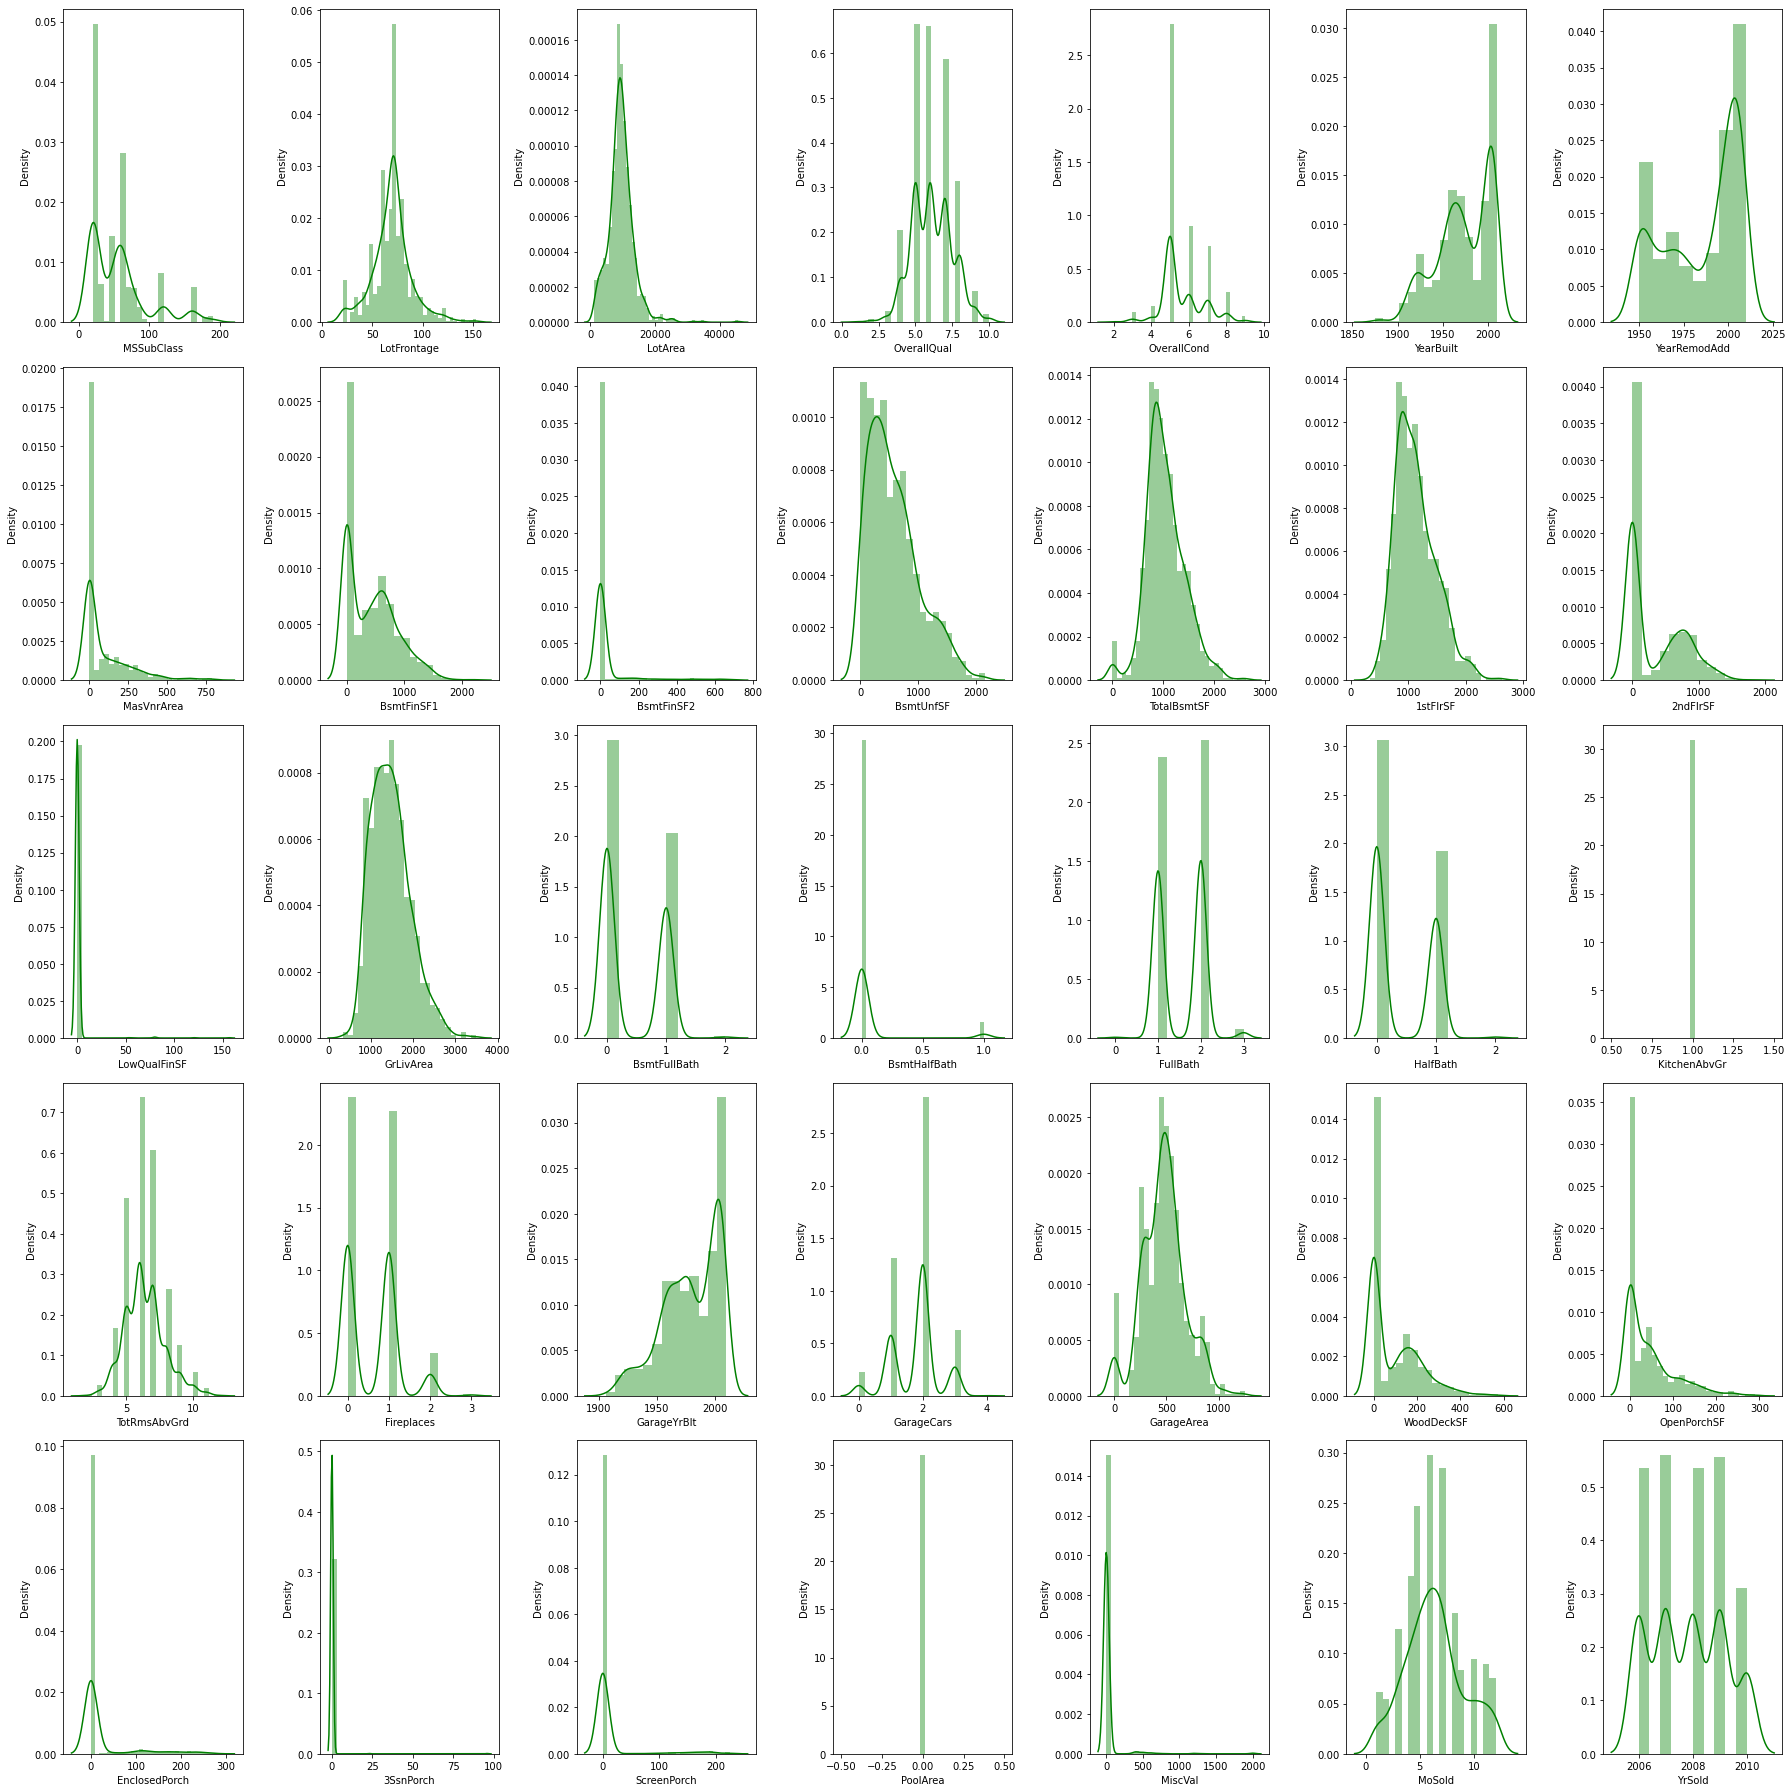

In [22]:
numcolnew= ['MSSubClass', 'LotFrontage','LotArea', 'OverallQual','OverallCond', 'YearBuilt', 'YearRemodAdd','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea', 'BsmtFullBath','BsmtHalfBath', 'FullBath', 'HalfBath','KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
plt.figure(figsize=(25,25))
for i in range(0,len(numcolnew)):
    plt.subplot(5,7,i+1)
    sn.distplot(dfnew[numcolnew[i]],color='green')
    plt.tight_layout()

Visual representation of having skewness in the dataset.

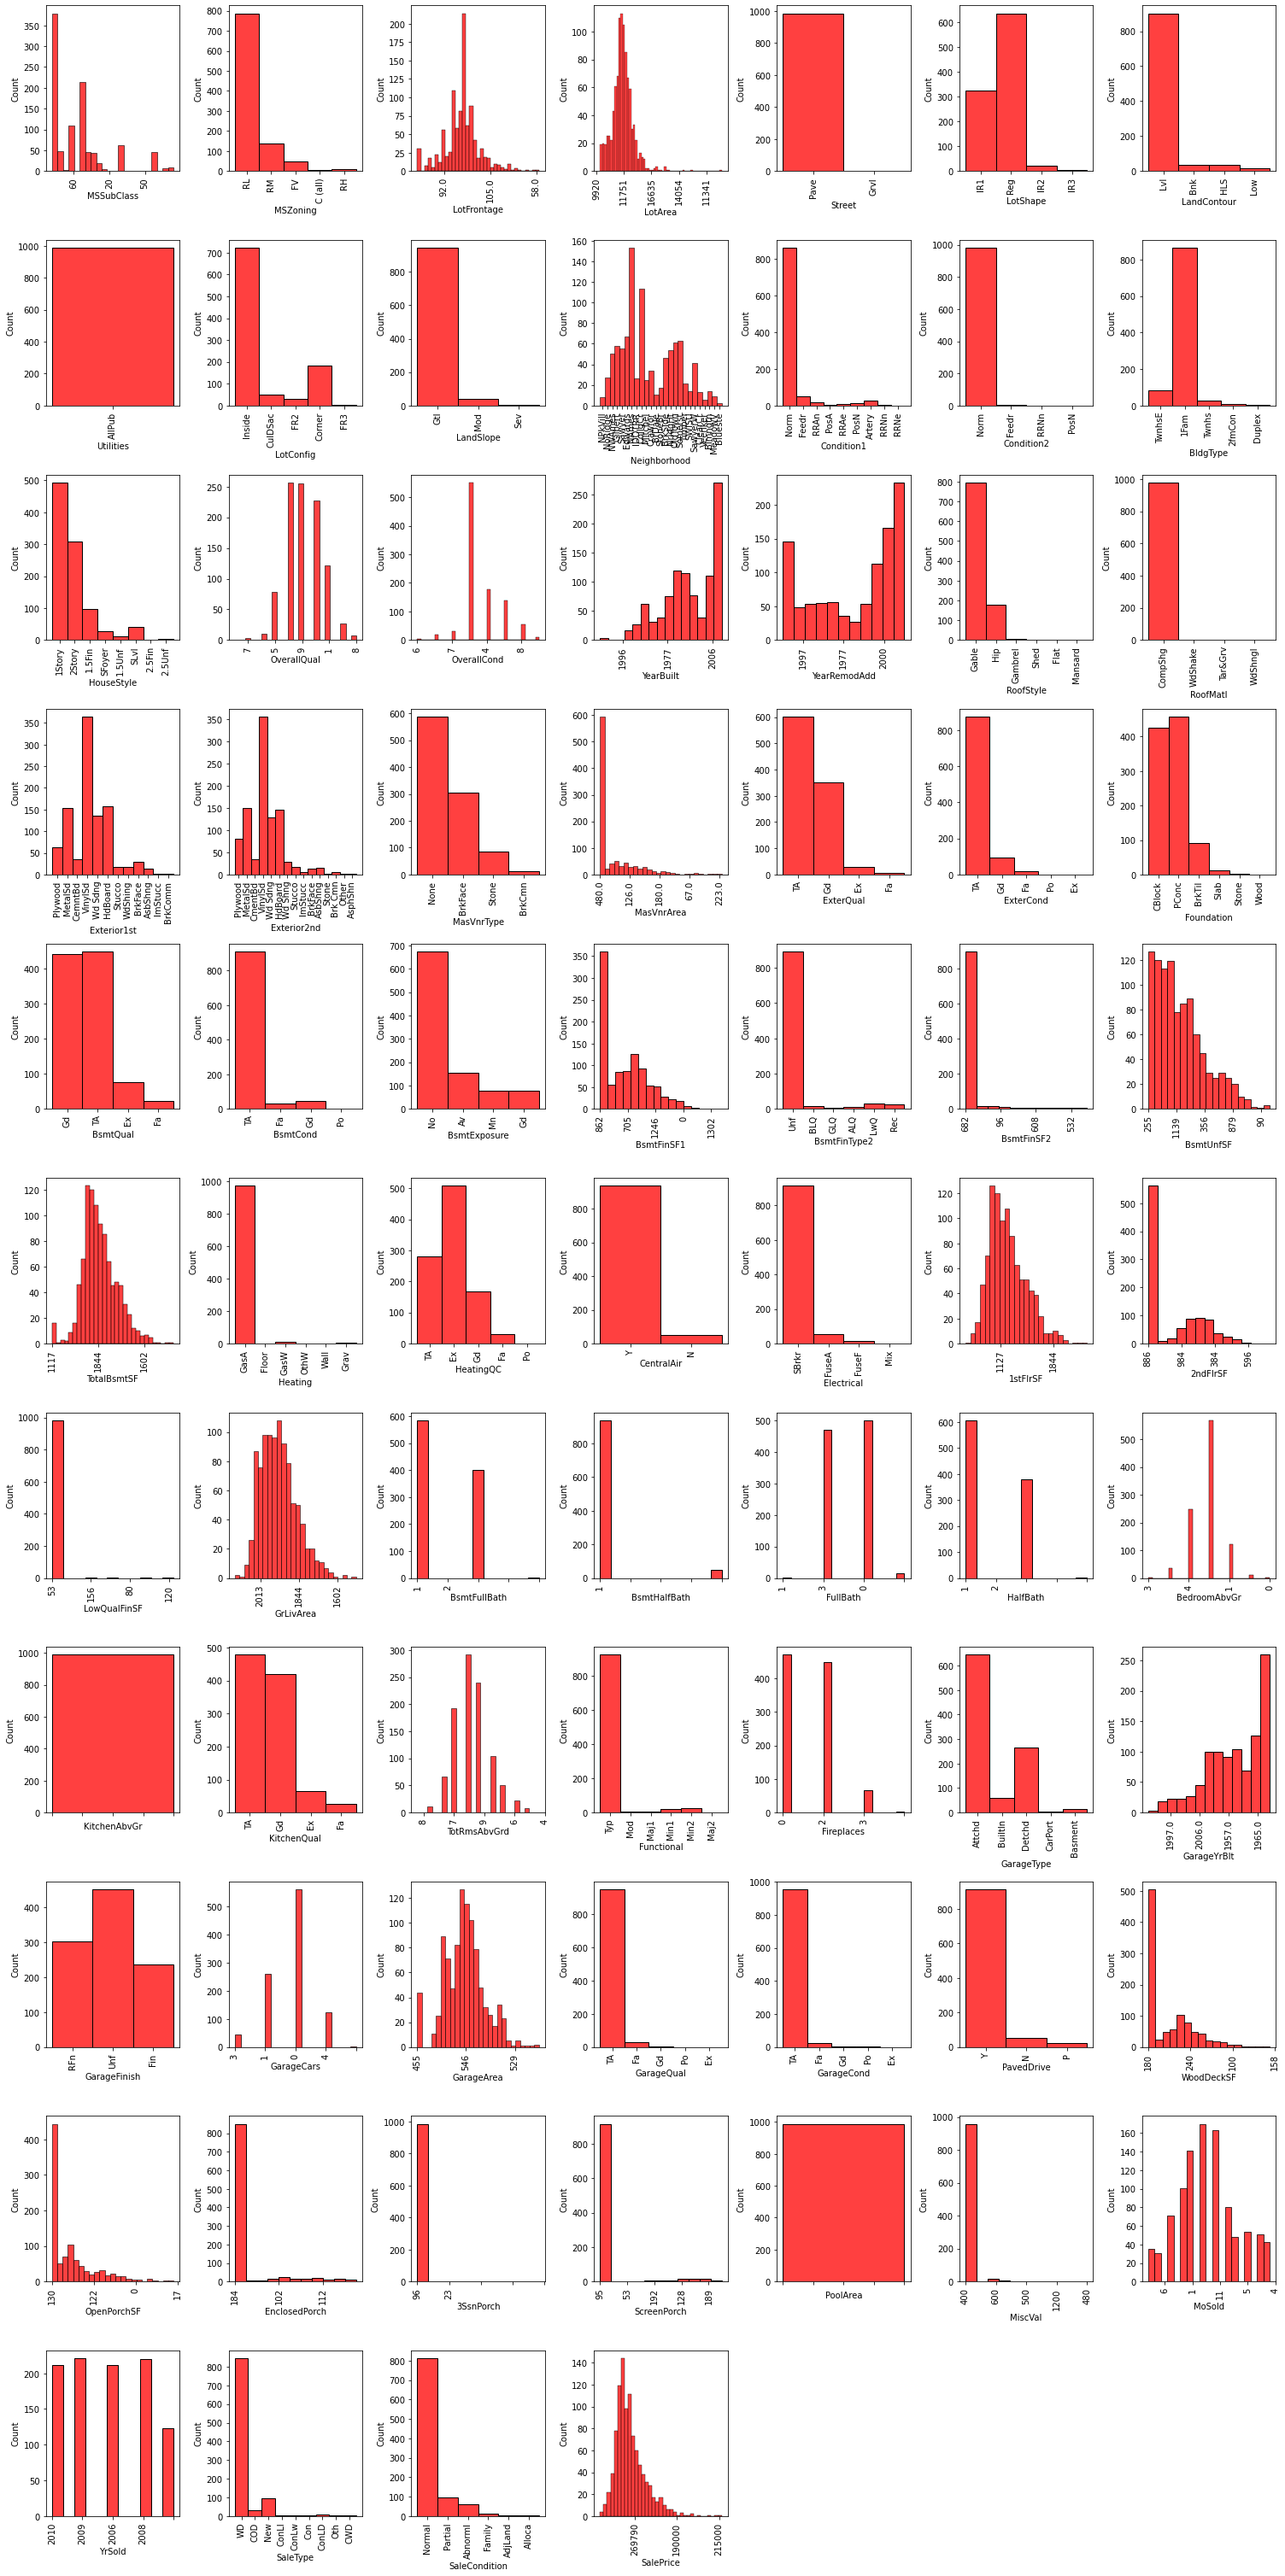

In [23]:
collist=dfnew.columns.values
ncol=5
nrows=7
plt.figure(figsize=(3*nrows,6*nrows))
for i in range(0,len(collist)):
    plt.subplot(11,7,i+1)
    sn.histplot(data=dfnew[collist[i]],color='red').set_xticklabels(labels=dfnew[collist[i]].unique(),rotation=90)
    plt.tight_layout()

We have observed from the above histogram plot that the columns like 'Street', 'Utilities', 'LotContour', 'KitchenAbvGr', '3SsnPorch', 'PoolArea', and 'YrSold' have least contribution in the data prediction as they contains of almost only same values in them.

<AxesSubplot:xlabel='SalePrice'>

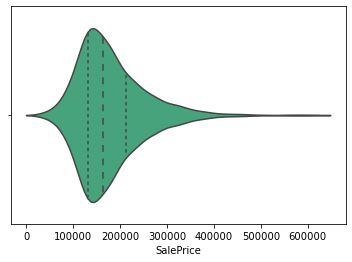

In [24]:
sn.violinplot(x=dftrain['SalePrice'], inner="quartile", color="#36B37E")

Our dataset contains a lot of variables, but the most important one for us to explore is the target
variable. We need to understand its distribution. First, we start by plotting the violin plot for the
target variable. The width of the violin represents the frequency.

We can see from the plot that most house prices fall between 100,000 and 250,000. The dashed
lines represent the locations of the three quartiles Q1, Q2 (the median), and Q3.

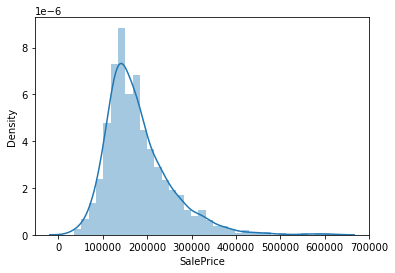

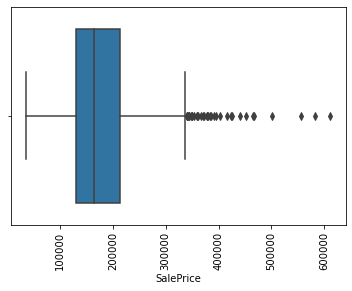

In [25]:
sn.distplot(dftrain['SalePrice'])
plt.show()
sn.boxplot(dftrain['SalePrice'])
plt.xticks(rotation=90)
plt.show()

The target variable is very tightly distributed.

The target has a normal distribution.

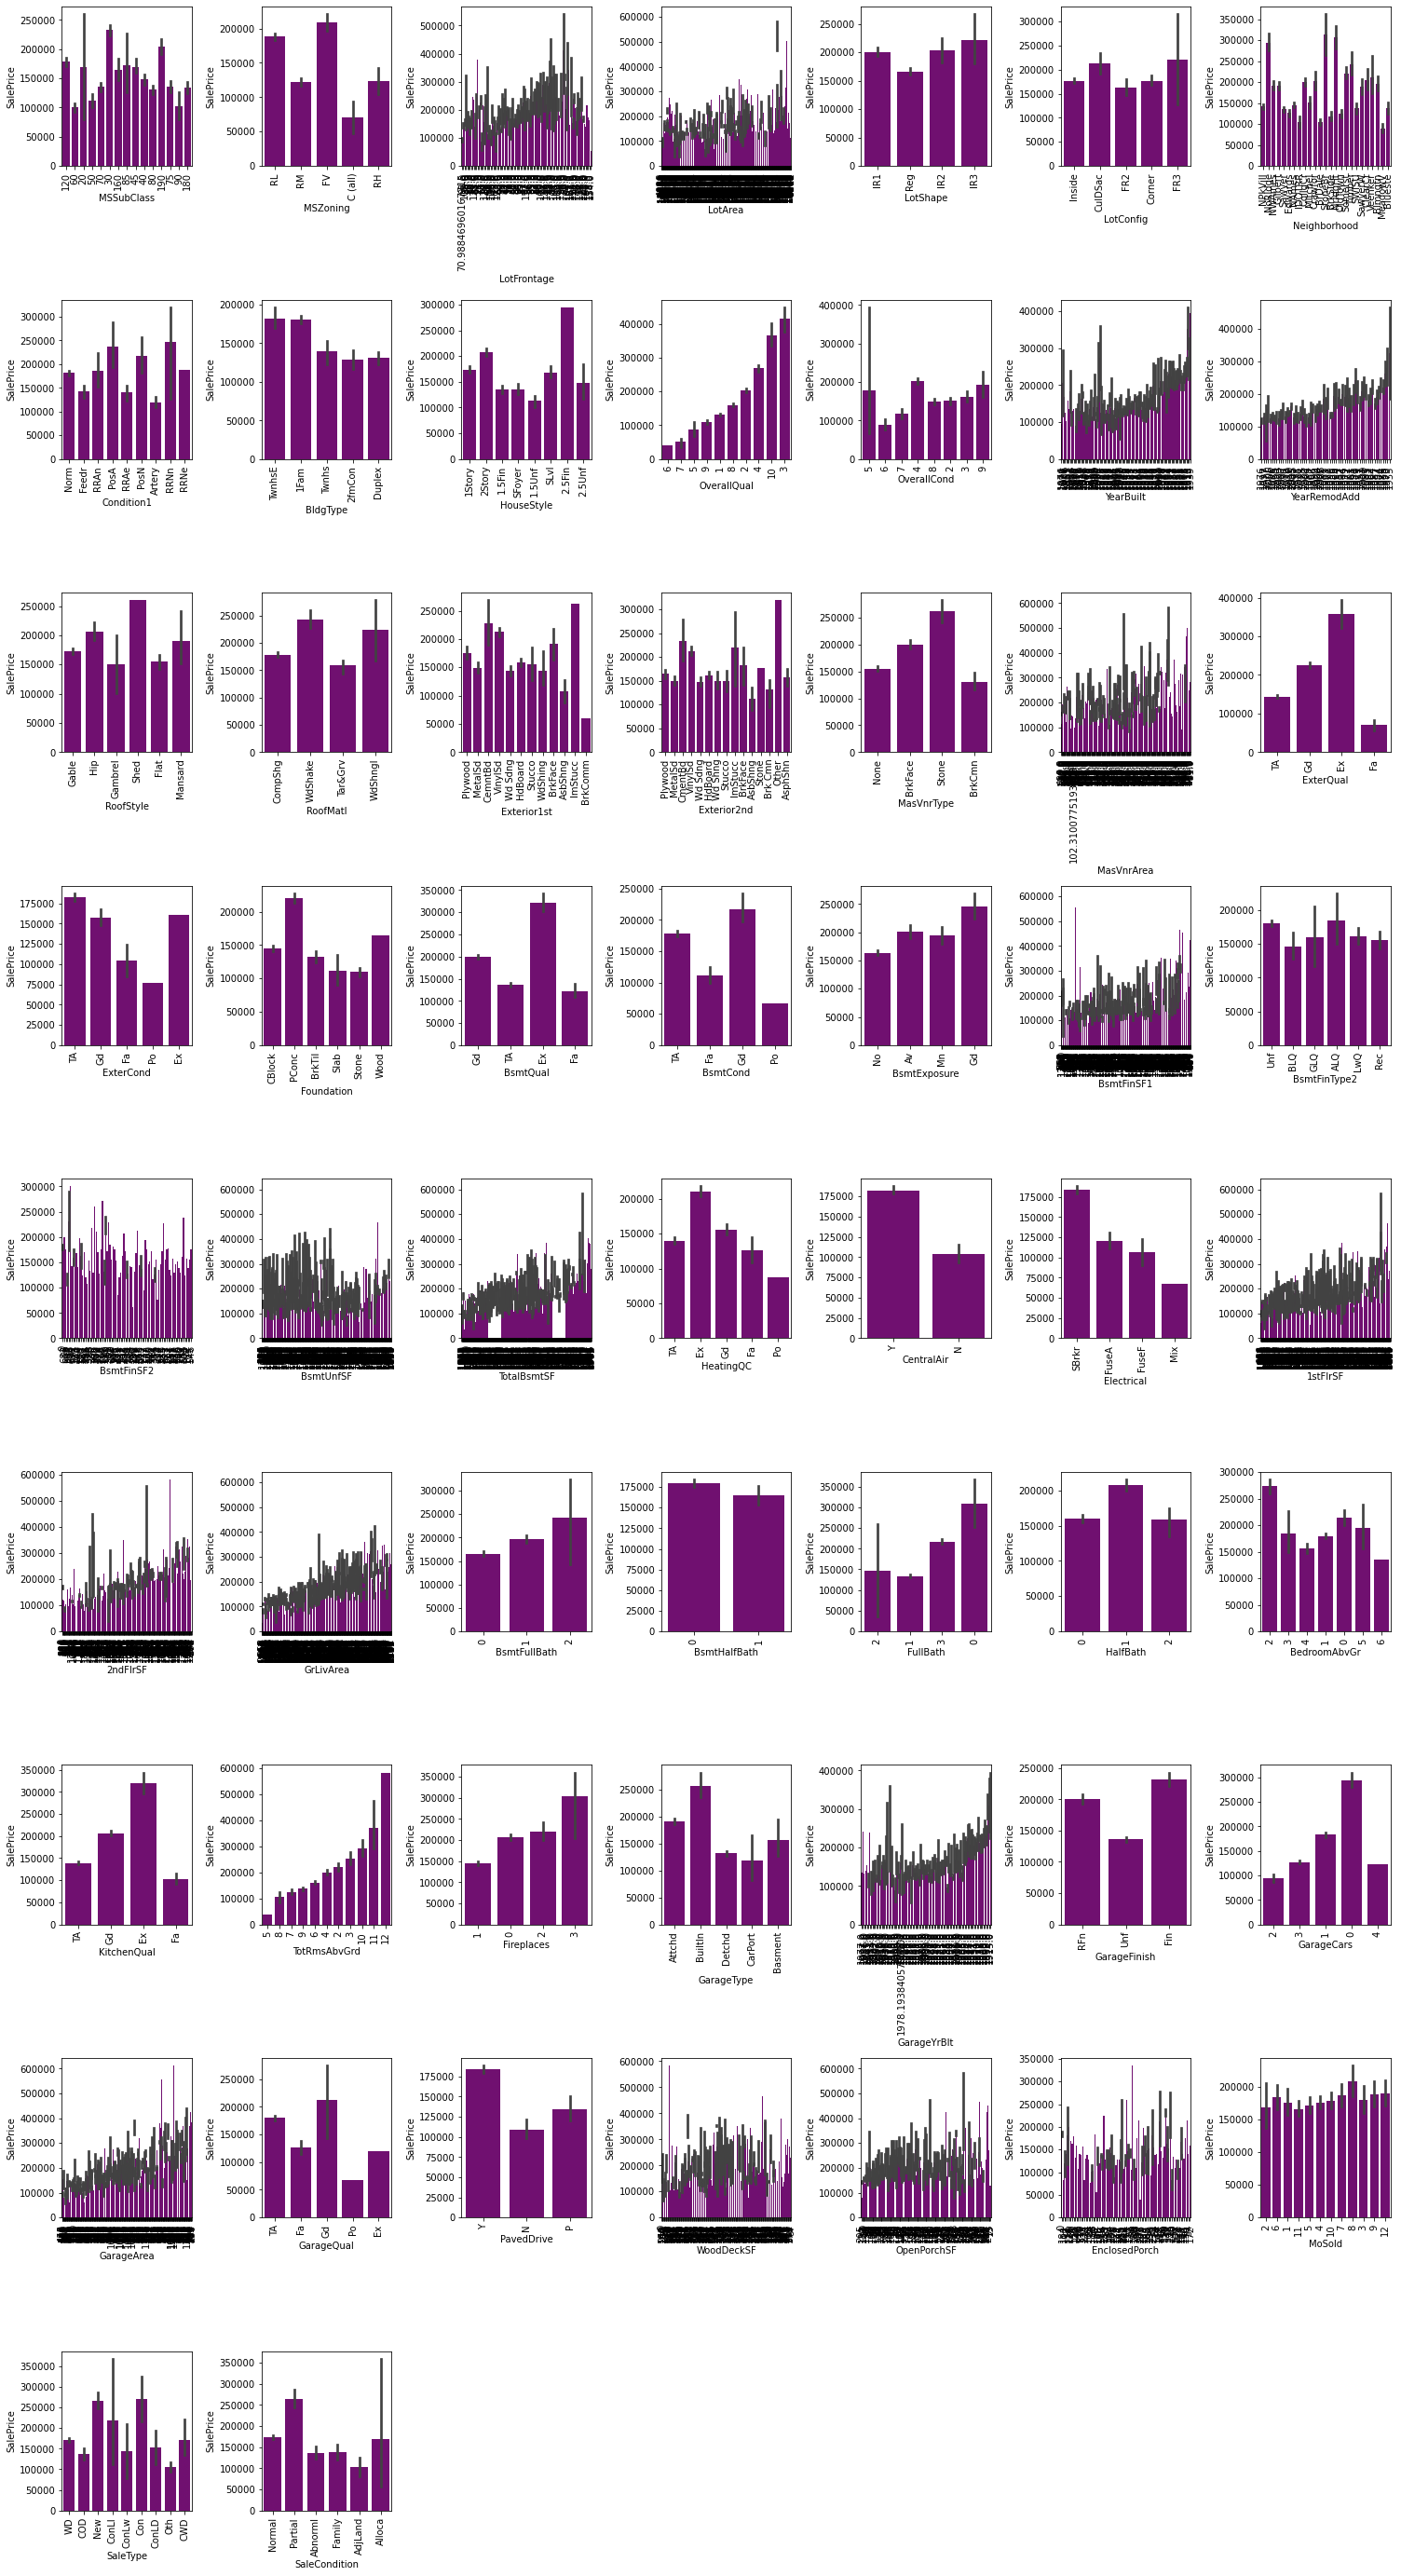

In [26]:
dftrain.drop(['Street', 'Utilities', 'Condition2', 'LandSlope', 'LandContour', 'Heating', 'LowQualFinSF', 'Functional', 'KitchenAbvGr', 'GarageCond', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'BsmtFinType1', 'YrSold'],axis=1,inplace=True)
dftest.drop(['Street', 'Utilities', 'Condition2', 'LandSlope', 'LandContour', 'Heating', 'LowQualFinSF', 'Functional', 'KitchenAbvGr', 'GarageCond', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'BsmtFinType1', 'YrSold'],axis=1,inplace=True)
collist=dftrain.drop(['SalePrice'],axis=1).columns.values
ncol=5
nrows=7
plt.figure(figsize=(3*nrows,6*nrows))
for i in range(0,len(collist)):
    plt.subplot(10,7,i+1)
    sn.barplot(data=dfnew, x=collist[i], y='SalePrice', color='purple').set_xticklabels(labels=dfnew[collist[i]].unique(),rotation=90)
    plt.tight_layout()

There are still so many features and all are affecting the target either in positive way or in negative way. Now let's check out the correlation.

In [27]:
le=LabelEncoder()
cnt=0
for col in dftest :
    if dftest[col].dtype=='object':
        le.fit(dftest[col])
        dftest[col] = le.transform(dftest[col])
        cnt += 1

cont=0
for col in dftrain :
    if dftrain[col].dtype=='object':
        le.fit(dftrain[col])
        dftrain[col] = le.transform(dftrain[col])
        cont += 1

Changing the object datatype into nominal by the use of Label Encoding technique.

In [28]:
dftrain.corr()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,...,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,SaleType,SaleCondition,SalePrice
MSSubClass,1.000000,0.001293,-0.437518,-0.381594,0.086424,0.099720,-0.045326,0.004419,0.772670,0.455770,...,-0.073011,0.032744,0.010454,-0.004817,0.066675,-0.034887,-0.016248,0.017455,-0.017274,-0.021499
MSZoning,0.001293,1.000000,-0.094640,-0.076873,0.055261,-0.040067,-0.298547,-0.021915,-0.014360,-0.117078,...,-0.239172,-0.154020,-0.093673,-0.012712,-0.195947,0.136512,-0.043591,0.090722,-0.016204,-0.178805
LotFrontage,-0.437518,-0.094640,1.000000,0.550596,-0.159170,-0.201543,0.122470,-0.027739,-0.484259,0.023712,...,0.322760,0.050562,0.093924,0.110400,0.126252,-0.000575,0.018593,-0.033305,0.102864,0.336481
LotArea,-0.381594,-0.076873,0.550596,1.000000,-0.240274,-0.172961,0.088175,0.087170,-0.470264,-0.004871,...,0.289078,0.007351,0.030453,0.187882,0.103289,-0.016839,0.015886,0.001370,0.083299,0.340740
LotShape,0.086424,0.055261,-0.159170,-0.240274,1.000000,0.208298,-0.055431,-0.131356,0.094347,-0.128622,...,-0.157498,-0.112067,-0.134510,-0.125964,-0.109952,0.111061,-0.039474,-0.010816,-0.084889,-0.224405
LotConfig,0.099720,-0.040067,-0.201543,-0.172961,0.208298,1.000000,-0.043097,0.012569,0.124504,-0.029678,...,-0.069474,0.013910,-0.033091,-0.027598,-0.054015,-0.071502,0.008220,-0.002109,0.010788,-0.029223
Neighborhood,-0.045326,-0.298547,0.122470,0.088175,-0.055431,-0.043097,1.000000,-0.005517,-0.006295,0.030024,...,0.232350,0.030195,0.085732,0.068120,0.190253,0.029239,0.029602,-0.035268,0.051417,0.226325
Condition1,0.004419,-0.021915,-0.027739,0.087170,-0.131356,0.012569,-0.005517,1.000000,-0.016066,0.105063,...,0.089718,0.036529,0.070973,0.046416,0.140556,-0.042718,-0.015112,-0.011536,0.044417,0.120813
BldgType,0.772670,-0.014360,-0.484259,-0.470264,0.094347,0.124504,-0.006295,-0.016066,1.000000,0.071488,...,-0.040275,0.073038,0.082399,0.001149,0.012179,-0.109341,-0.026703,-0.030000,0.009056,-0.034421
HouseStyle,0.455770,-0.117078,0.023712,-0.004871,-0.128622,-0.029678,0.030024,0.105063,0.071488,1.000000,...,0.164483,0.043093,0.116204,0.068584,0.183962,-0.090835,0.038555,0.051012,0.046778,0.209554


From the above correlation we conclude that columns 'MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'Condition1', 'BldgType', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF','BsmtFullBath', 'BsmtHalfBath', 'Electrical', '2ndFlrSF', 'BedroomAbvGr', 'GarageQual', 'PavedDrive', 'EnclosedPorch', 'MoSold', 'SaleType' have least correlation from the target hence we will drop them as well.

<AxesSubplot:>

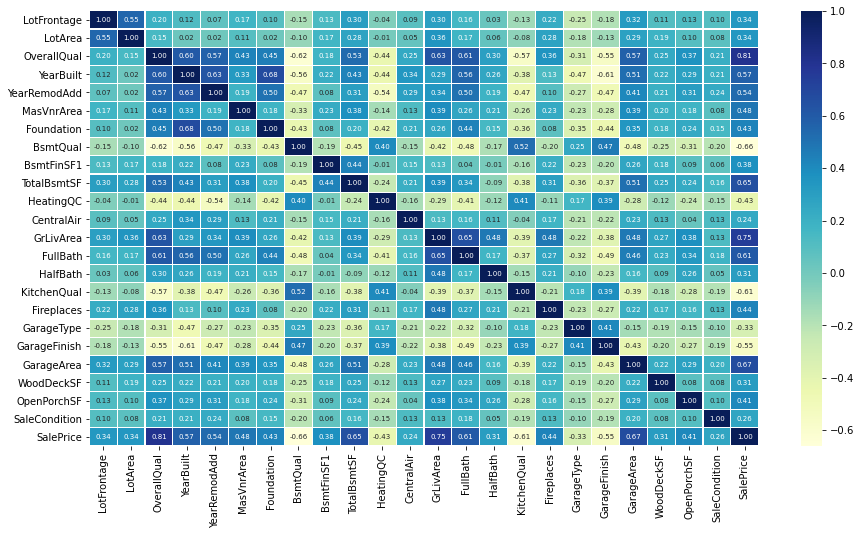

In [29]:
dftrain.drop(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'ExterQual', 'Neighborhood', 'HouseStyle', 'Condition1', 'BldgType', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF','BsmtFullBath', 'BsmtHalfBath', 'Electrical', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageQual', 'GarageYrBlt', 'GarageCars', 'PavedDrive', 'EnclosedPorch', 'MoSold', 'SaleType'],axis=1,inplace=True)
dftest.drop(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'ExterQual', 'Neighborhood', 'HouseStyle', 'Condition1', 'BldgType', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF','BsmtFullBath', 'BsmtHalfBath', 'Electrical', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageQual', 'GarageYrBlt', 'GarageCars', 'PavedDrive', 'EnclosedPorch', 'MoSold', 'SaleType'],axis=1,inplace=True)
a=dftrain.corr()
plt.figure(figsize=(15,8))
sn.heatmap(a,linewidth=0.1, cmap="YlGnBu", annot = True, annot_kws={"size":7}, fmt='.2f')

There is no multi-collinearity in the dataset.

# Feature Selection and Data Split

In [30]:
numeric_feats = dftrain.dtypes[dftrain.dtypes != "object"].index
dftrain[numeric_feats].skew()

LotFrontage     0.336254
LotArea         1.656929
OverallQual     0.108019
YearBuilt      -0.581061
YearRemodAdd   -0.544148
MasVnrArea      1.994049
BsmtFinSF1      0.691579
TotalBsmtSF     0.445178
GrLivArea       0.689319
FullBath        0.124887
HalfBath        0.528769
Fireplaces      0.633181
GarageArea      0.142288
WoodDeckSF      1.143722
OpenPorchSF     1.551887
SalePrice       1.499289
dtype: float64

There exists skewness in 'LotArea', 'MasVnrArea', 'WoodDeckSF' and 'OpenPorchSF'.

In [31]:
dftrain["LotArea"] = np.log1p(dftrain["LotArea"])
dftrain["MasVnrArea"] = np.log1p(dftrain["MasVnrArea"])
dftrain["WoodDeckSF"] = np.log1p(dftrain["WoodDeckSF"])
dftrain["OpenPorchSF"] = np.log1p(dftrain["OpenPorchSF"])

Treating the skewness using log method

In [32]:
dftrain.skew()

LotFrontage     0.336254
LotArea        -1.197908
OverallQual     0.108019
YearBuilt      -0.581061
YearRemodAdd   -0.544148
MasVnrArea      0.454036
BsmtFinSF1      0.691579
TotalBsmtSF     0.445178
GrLivArea       0.689319
FullBath        0.124887
HalfBath        0.528769
Fireplaces      0.633181
GarageArea      0.142288
WoodDeckSF      0.081865
OpenPorchSF    -0.053983
SalePrice       1.499289
dtype: float64

There is still skewness present in 'LotArea' which we will treat using power transformation. Since SalePrice is our target, we will treat it's skewness.

In [33]:
x=dftrain.drop(['SalePrice'],axis=1)
y=dftrain['SalePrice']

Separating feature and target variables into x and y respectively.

In [34]:
from sklearn.preprocessing import power_transform
scaler = MinMaxScaler(feature_range=(1, 2))
x=scaler.fit_transform(X)
x=power_transform(x,method='yeo-johnson')
scale = StandardScaler()
x=scale.fit_transform(x)

dftest=power_transform(dftest,method='yeo-johnson')
dftest=scale.fit_transform(dftest)

Scaling and transforming the feature variables of train dataset & test dataset.

# Model Building

# 1. Linear Regression

In [35]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 5 )
lr= LinearRegression()
lr.fit(xtrain,ytrain)
lr.coef_
pred_train=lr.predict(xtrain)
pred_test=lr.predict(xtest)
print('Linear Regression Score:',lr.score(xtrain,ytrain))
print('Linear Regression r2_score:',r2_score(ytest,pred_test))
print("Mean squared error of Linear Regression:",mean_squared_error(ytest,pred_test))
print("Root Mean Square error of Linear Regression:",np.sqrt(mean_squared_error(ytest,pred_test)))

Linear Regression Score: 0.8470502825605732
Linear Regression r2_score: 0.8581493069513298
Mean squared error of Linear Regression: 775129481.9495882
Root Mean Square error of Linear Regression: 27841.147281489462


The accuracy of Linear Regression is 85.81% which is quite good.

# 2. Ridge

In [36]:
from sklearn.linear_model import Ridge, ElasticNet
ridge = Ridge(alpha = 0.5)
ridge.fit(xtrain, ytrain)
pred_test_r= ridge.predict(xtest)
print('Ridge Regression Score:',ridge.score(xtrain,ytrain))
print('Ridge Regression r2_score:',r2_score(ytest,pred_test_r))
print("Mean squared error of Ridge Regression:",mean_squared_error(ytest,pred_test_r))
print("Root Mean Square error of Ridge Regression:",np.sqrt(mean_squared_error(ytest,pred_test_r)))

Ridge Regression Score: 0.8470501202143325
Ridge Regression r2_score: 0.8581727907666389
Mean squared error of Ridge Regression: 775001156.8973557
Root Mean Square error of Ridge Regression: 27838.842592632252


The accuracy of Ridge Regression is 85.81%, same as Linear Regression.

# 3. Elastic Net

In [37]:
en = ElasticNet(alpha = 0.01)
en.fit(xtrain, ytrain)
pred_test_en= en.predict(xtest)
print('ElasticNet Regression Score:',en.score(xtrain,ytrain))
print('ElasticNet Regression r2_score:',r2_score(ytest,pred_test_en))
print("Mean squared error of ElasticNet Regression:",mean_squared_error(ytest,pred_test_en))
print("Root Mean Square error of ElasticNet Regression:",np.sqrt(mean_squared_error(ytest,pred_test_en)))

ElasticNet Regression Score: 0.8470427260250485
ElasticNet Regression r2_score: 0.8583010995581436
Mean squared error of ElasticNet Regression: 774300025.8351724
Root Mean Square error of ElasticNet Regression: 27826.24706702599


The accuracy of ElasticNet Regression is 85.83%, same as Linear and Ridge Regression.

# 4. SGD Regressor

In [38]:
sgd=SGDRegressor()
sgd.fit(xtrain,ytrain)
pred_train_sgd=sgd.predict(xtrain)
pred_test_sgd=sgd.predict(xtest)
print('SGD Regressor Score:',sgd.score(xtrain,ytrain))
print('SGD Regressor r2_score:',r2_score(ytest,pred_test_sgd))
print("Mean squared error of SGD Regressor:",mean_squared_error(ytest,pred_test_sgd))
print("Root Mean Square error of SGD Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_sgd)))

SGD Regressor Score: 0.846357845480139
SGD Regressor r2_score: 0.8562163476396343
Mean squared error of SGD Regressor: 785691952.3732618
Root Mean Square error of SGD Regressor: 28030.197151880002


The accuracy of SGDRegressor is 85.62%

# 5. K-Neighbors Regressor

In [39]:
knr = KNeighborsRegressor()
knr.fit(xtrain,ytrain)
pred_train_knr=knr.predict(xtrain)
pred_test_knr=knr.predict(xtest)
print('K Neighbors Regressor Score:',knr.score(xtrain,ytrain))
print('K Neighbors Regressor r2_score:',r2_score(ytest,pred_test_knr))
print("Mean squared error of K Neighbors Regressor:",mean_squared_error(ytest,pred_test_knr))
print("Root Mean Square error of K Neighbors Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_knr)))

K Neighbors Regressor Score: 0.8858618586776874
K Neighbors Regressor r2_score: 0.855375812005502
Mean squared error of K Neighbors Regressor: 790284978.5802021
Root Mean Square error of K Neighbors Regressor: 28112.007729441917


The accuracy of KNeighbors Regressor is 85.53%

# 6. Decision Tree Regressor

In [40]:
dtr=DecisionTreeRegressor(criterion='mse')
dtr.fit(xtrain,ytrain)
pred_train_dtr=dtr.predict(xtrain)
pred_test_dtr=dtr.predict(xtest)
print('Decision Tree Regressor Score:',dtr.score(xtrain,ytrain))
print('Decision Tree Regressor r2_score:',r2_score(ytest,pred_test_dtr))
print("Mean squared error of Decision Tree Regressor:",mean_squared_error(ytest,pred_test_dtr))
print("Root Mean Square error of Decision Tree Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_dtr)))

Decision Tree Regressor Score: 1.0
Decision Tree Regressor r2_score: 0.7824081215082161
Mean squared error of Decision Tree Regressor: 1189009911.9494948
Root Mean Square error of Decision Tree Regressor: 34482.02302576655


The accuracy of Decision Tree Regressor is 78.24%

# 7. Random Forest Regressor

In [41]:
rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)
pred_train_rf=rf.predict(xtrain)
pred_test_rf=rf.predict(xtest)
print('Random Forest Regressor Score:',rf.score(xtrain,ytrain))
print('Random Forest Regressor r2_score:',r2_score(ytest,pred_test_rf))
print("Mean squared error of Random Forest Regressor:",mean_squared_error(ytest,pred_test_rf))
print("Root Mean Square error of Random Forest Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_rf)))

Random Forest Regressor Score: 0.9793599261784415
Random Forest Regressor r2_score: 0.885237262879892
Mean squared error of Random Forest Regressor: 627109949.6179727
Root Mean Square error of Random Forest Regressor: 25042.163437250638


The accuracy of Random Forest Regressor is 88.52% which is really very good.

# 8. Gradient Boosting Regressor

In [42]:
from sklearn.ensemble import GradientBoostingRegressor
gb=RandomForestRegressor()
gb.fit(xtrain,ytrain)
pred_train_gb=gb.predict(xtrain)
pred_test_gb=gb.predict(xtest)
print('Gradient Boosting Regressor Score:',gb.score(xtrain,ytrain))
print('Gradient Boosting Regressor r2_score:',r2_score(ytest,pred_test_gb))
print("Mean squared error of Gradient Boosting Regressor:",mean_squared_error(ytest,pred_test_gb))
print("Root Mean Square error of Gradient Boosting Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_gb)))

Gradient Boosting Regressor Score: 0.9803416144519056
Gradient Boosting Regressor r2_score: 0.8872286569738848
Mean squared error of Gradient Boosting Regressor: 616228167.9413441
Root Mean Square error of Gradient Boosting Regressor: 24823.94344058462


The accuracy of Gradient Boosting Regressor is 88.72% which is highest of all.

In [43]:
#We can also use Lasso, SVM, etc. 

#from sklearn.linear_model import Lasso
#l = Lasso(alpha = 0.5)
#l.fit(xtrain, ytrain)
#pred_test_l= l.predict(xtest)
#print('Lasso Regression Score:',l.score(xtrain,ytrain))
#print('Lasso Regression r2_score:',r2_score(ytest,pred_test_l))
#print("Mean squared error of Lasso Regression:",mean_squared_error(ytest,pred_test_l))
#print("Root Mean Square error of Lasso Regression:",np.sqrt(mean_squared_error(ytest,pred_test_l)))

#from sklearn.svm import SVR
#s=SVR()
#s.fit(xtrain, ytrain)
#pred_test_s= s.predict(xtest)
#print('SVRegression Score:',s.score(xtrain,ytrain))
#print('SVRegression r2_score:',r2_score(ytest,pred_test_s))
#print("Mean squared error of SVRegression:",mean_squared_error(ytest,pred_test_s))
#print("Root Mean Square error of SVRegression:",np.sqrt(mean_squared_error(ytest,pred_test_s)))

# Cross Validation Score

In [44]:
print('Cross Validation Score of Linear Regression is',(cvs(lr,x,y,cv=5).mean())*100)
print('Cross Validation Score of Ridge is',(cvs(ridge,x,y,cv=5).mean())*100)
print('Cross Validation Score of Elastic Net is',(cvs(en,x,y,cv=5).mean())*100)
print('Cross Validation Score of SGD Regressor is',(cvs(sgd,x,y,cv=5).mean())*100)
print('Cross Validation Score of KNeighbors Regressor is',(cvs(knr,x,y,cv=5).mean())*100)
print('Cross Validation Score of Decision Tree Regressor is',(cvs(dtr,x,y,cv=5).mean())*100)
print('Cross Validation Score of Random Forest Regressor is',(cvs(rf,x,y,cv=5).mean())*100)
print('Cross Validation Score of Gradient Boosting Regressor is',(cvs(gb,x,y,cv=5).mean())*100)

Cross Validation Score of Linear Regression is 83.8906779563979
Cross Validation Score of Ridge is 83.8939195644605
Cross Validation Score of Elastic Net is 83.91524510751178
Cross Validation Score of SGD Regressor is 83.86054417052415
Cross Validation Score of KNeighbors Regressor is 82.42181132759269
Cross Validation Score of Decision Tree Regressor is 71.08658022335115
Cross Validation Score of Random Forest Regressor is 87.41732113627245
Cross Validation Score of Gradient Boosting Regressor is 87.30577148477424


The least difference between CVS and Accuracy is for Random Forest Regressor, hence we will Hyper tune this model.

# Hyper Parameter Tuning

In [45]:
parameter = { 'bootstrap': [True, False],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],}

gvc = GridSearchCV(RandomForestRegressor(),parameter,cv=5)
gvc.fit(xtrain,ytrain)
gvc.best_params_

{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2}

Getting all the best parameter to apply in our selected model.

In [46]:
pricehouse = RandomForestRegressor(bootstrap=False,min_samples_leaf=2,max_features='sqrt',min_samples_split=2)
pricehouse.fit(xtrain,ytrain)
pred=pricehouse.predict(xtest)
acc=r2_score(ytest,pred)
print('Score of Hyper Parameter Tuned Ranfom Forest Regressor is:',pricehouse.score(xtrain,ytrain))
print('Accuracy for predicting price of house is', (acc*100),'%')
print("Mean squared error of Hyper Parameter Tuned Random Forest Regressor:",mean_squared_error(ytest,pred))
print("Root Mean Square error of Hyper Parameter Tuned Random Forest Regressor:",np.sqrt(mean_squared_error(ytest,pred)))

Score of Hyper Parameter Tuned Ranfom Forest Regressor is: 0.989940327327043
Accuracy for predicting price of house is 89.03600996309645 %
Mean squared error of Hyper Parameter Tuned Random Forest Regressor: 599116700.43724
Root Mean Square error of Hyper Parameter Tuned Random Forest Regressor: 24476.860510229657


The accuracy of Model 'Pricehouse' (Random Forest Regressor) after applying Hyper Tuned Parameters is found to be 89.03% and the score is 0.98 which is quite good.

# Conclusion

In [47]:
a= np.array(ytest)
predicted = np.array(pricehouse.predict(xtest))
hp=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
hp

,Original,Predicted
0,140000,141908.583333
1,139900,136734.438095
2,37900,73558.128095
3,84500,138841.118095
4,200100,156559.604524
...,...,...
292,140000,151059.165000
293,147000,151788.860000
294,140000,133380.227500
295,72500,84606.446667


The predicted price lies very close to the original price. Hence we accept this model.

# Model Saving

In [48]:
import pickle
filename = 'HousePrice.pkl'
pickle.dump(pricehouse,open(filename,'wb'))

Saving the Hyper Parameter Tuned RandomForestRegressor model.

# Predicting House Prices

In [49]:
load_model=pickle.load(open(filename,'rb'))
price=load_model.predict(dftest)
HousePrice=pd.DataFrame({ 'Price': price })
HousePrice

,Price
0,313610.859167
1,205575.584762
2,253963.041875
3,164385.263333
4,218878.790000
...,...
287,262315.057565
288,145958.166667
289,149270.716667
290,151941.096667


Predicting the housing price for test dataset and loading it into a Data Frame. 

In [50]:
HousePrice.to_csv('Housing Price.csv',index=False)

Saving the cvs file of predicted house price.